In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import seaborn as sns
import sqlalchemy as sql
import seaborn as sns

from sqlalchemy import create_engine

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [192]:
string_connection = 'mysql+mysqlconnector://{user}:{password}@{server}/{database}'.format(
                    user='root',
                    password='125478',
                    server='127.0.0.1',
                    database='analise_risco')

cnx = sql.create_engine(string_connection)


In [193]:
dados = pd.read_sql('select * from analise_risco.dados_modelo_ml', cnx)
             
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pessoa_id              34485 non-null  object 
 1   pessoa_idade           34165 non-null  float64
 2   salario_ano            34150 non-null  float64
 3   propriedade_sit        34485 non-null  object 
 4   ano_trabalhado         33231 non-null  float64
 5   motivo_emprestimo      34485 non-null  object 
 6   pontuacao_emprestimos  34485 non-null  object 
 7   vl_total               34154 non-null  float64
 8   tx_juros               30859 non-null  float64
 9   inadimplencia          34142 non-null  float64
 10  tx_renda_divida        34170 non-null  float64
 11  hst_inadimplencia      34119 non-null  float64
 12  hst_primeiro_credito   34485 non-null  int64  
dtypes: float64(8), int64(1), object(4)
memory usage: 3.4+ MB


In [194]:
#Variaveis Categóricas depara

# propriedade_sit,
# motivo_emprestimo,
# pontuacao_emprestimos,


# dados["propriedade_sit"].unique()

A = {
    "Hipotecada":1,
    "Própria":2,
    "Alugada":3,
    "Outros":4,
    "-":0,
}

dados["propriedade_sit"] = dados["propriedade_sit"].map(A)

dados["motivo_emprestimo"].unique()

B = {'Pagamento de débitos': 1,
     'Pessoal': 2,
     'Educativo': 3,
     'Médico': 4,
     'Empreendimento': 5,
     'Melhora do lar': 6,
     '-': 0
     }

dados["motivo_emprestimo"] = dados["motivo_emprestimo"].map(B)

dados["pontuacao_emprestimos"].unique()

C = {'D': 4,
     'B': 2,
     'A': 1,
     'C': 3,
     'E': 5,
     'F': 6,
     '': 0,
     'G': 7}

dados["pontuacao_emprestimos"] = dados["pontuacao_emprestimos"].map(C)


In [195]:
# Analise das Variaveis Numéricas

# pessoa_idade
# salario_ano
# ano_trabalhado
# vl_total
# tx_juros
# tx_renda_divida
# hst_primeiro_credito

colunas_numericas = ["pessoa_idade",
"salario_ano",
"ano_trabalhado",
"vl_total",
"tx_juros",
"tx_renda_divida",
"hst_primeiro_credito"]

dados[colunas_numericas].describe()


,pessoa_idade,salario_ano,ano_trabalhado,vl_total,tx_juros,tx_renda_divida,hst_primeiro_credito
count,34165.000,34150.000,33231.000,34154.000,30859.000,34170.000,34485.000
mean,27.731,66023.181,4.788,9590.560,11.013,0.170,5.809
std,6.346,61411.274,4.138,6321.217,3.240,0.107,4.064
min,20.000,4000.000,0.000,500.000,5.420,0.000,2.000
25%,23.000,38496.000,2.000,5000.000,7.900,0.090,3.000
50%,26.000,55000.000,4.000,8000.000,10.990,0.150,4.000
75%,30.000,79100.000,7.000,12200.000,13.470,0.230,8.000
max,144.000,6000000.000,123.000,35000.000,23.220,0.830,30.000


In [178]:
# histogramas = ['pessoa_idade', 'salario_ano',
#                'ano_trabalhado', 'hst_inadimplencia']
# histogramas = list(enumerate(histogramas))

# plt.figure(figsize=(30, 20))

# for i in histogramas:
#     plt.subplot(2, 2, i[0]+1)
#     sns.countplot(i[1], data=dados)
#     plt.title(i[1])
#     plt.xticks(rotation=45)


# Trabalhando com os Nulos.

  - Criar um Dataset sem nulos.
  - Criar um Dataset com os nulos tratados.


Dataset sem nulos:

In [196]:
df_dados_semnulos = dados.dropna()

df_dados_semnulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28769 entries, 1 to 34484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pessoa_id              28769 non-null  object 
 1   pessoa_idade           28769 non-null  float64
 2   salario_ano            28769 non-null  float64
 3   propriedade_sit        28769 non-null  int64  
 4   ano_trabalhado         28769 non-null  float64
 5   motivo_emprestimo      28769 non-null  int64  
 6   pontuacao_emprestimos  28769 non-null  int64  
 7   vl_total               28769 non-null  float64
 8   tx_juros               28769 non-null  float64
 9   inadimplencia          28769 non-null  float64
 10  tx_renda_divida        28769 non-null  float64
 11  hst_inadimplencia      28769 non-null  float64
 12  hst_primeiro_credito   28769 non-null  int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 3.1+ MB


Nulos Tratados

A idea é obter a mediana da variavel alvo atraves de agrupamento de outras variveis a qual não se possui valores nulos nas colunas.

In [180]:
# Para o segundo Dataset precisamos tratar estas colunas.
# pessoa_idade              320 Lista_GroupBY
# salario_ano               335 Lista_GroupBY
# ano_trabalhado           1254 Lista_GroupBY
# vl_total                  331 Exclusão
# tx_juros                 3626 Calcular
# inadimplencia             343 Separar 

# hst_inadimplencia         366 

In [197]:
# teste = dados.copy()

#duvida sobre hst_inadimplencia, se a media ou existe uma forma melhor de preencher.

lista_groupby = ['pessoa_idade', 'salario_ano',
                 'ano_trabalhado', 'tx_juros', 'hst_inadimplencia']

for i in lista_groupby:
    dados[i].fillna(dados.groupby(['propriedade_sit', 'motivo_emprestimo'])[i].transform('mean'), inplace=True)


# vl_total 331 nulos apenas, então irei excluir os registros
dados.dropna(axis=0,subset=['vl_total'], inplace=True)

# tx_renda_divida 315 por mais que seja pequeno o numero de nulos, é possível calcular.
dados.tx_renda_divida.fillna(dados.vl_total/dados.salario_ano, inplace=True)

# inadimplência             343
# Vou separar os dados nulos desta coluna para um dataset de predição, ja que no dicionario de dados consta como:
#possibilidade de inadimplência.

predicao = dados.copy(deep=True)
mask = pd.isnull(dados['inadimplencia'])
predicao = predicao[mask]

dados.dropna(axis=0,subset=['inadimplencia'], inplace=True)



In [199]:
predicao.reset_index(drop=True, inplace=True)
predicao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pessoa_id              307 non-null    object 
 1   pessoa_idade           307 non-null    float64
 2   salario_ano            307 non-null    float64
 3   propriedade_sit        307 non-null    int64  
 4   ano_trabalhado         307 non-null    float64
 5   motivo_emprestimo      307 non-null    int64  
 6   pontuacao_emprestimos  307 non-null    int64  
 7   vl_total               307 non-null    float64
 8   tx_juros               307 non-null    float64
 9   inadimplencia          0 non-null      float64
 10  tx_renda_divida        307 non-null    float64
 11  hst_inadimplencia      307 non-null    float64
 12  hst_primeiro_credito   307 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 31.3+ KB


# Tratamento de Variaveis Numericas

# Variaveis Numéricas


In [200]:
df_numericos = dados[colunas_numericas].copy()

df_numericos.describe()

,pessoa_idade,salario_ano,ano_trabalhado,vl_total,tx_juros,tx_renda_divida,hst_primeiro_credito
count,33847.000,33847.000,33847.000,33847.000,33847.000,33847.000,33847.000
mean,27.732,66072.684,4.793,9596.373,11.013,0.171,5.805
std,6.319,61323.660,4.073,6320.397,3.072,0.108,4.059
min,20.000,4000.000,0.000,500.000,5.420,0.000,2.000
25%,23.000,39000.000,2.000,5000.000,8.490,0.090,3.000
50%,26.000,55000.000,4.000,8000.000,10.990,0.150,4.000
75%,30.000,79200.000,7.000,12250.000,13.110,0.230,8.000
max,144.000,6000000.000,123.000,35000.000,23.220,1.419,30.000


<AxesSubplot:xlabel='hst_primeiro_credito'>

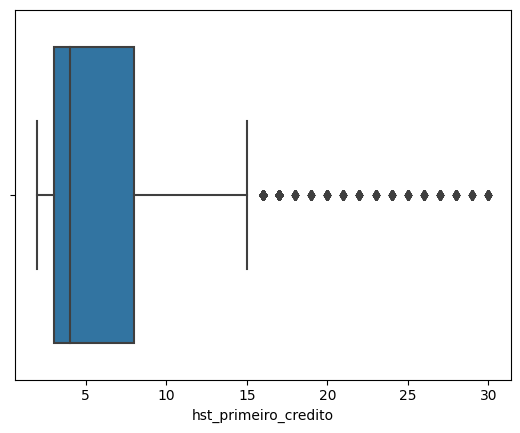

In [201]:
# for i in colunas_numericas:
#     plt.figure()
#     sns.boxplot(x=df_numericos[i])
    
sns.boxplot(x=df_numericos['hst_primeiro_credito'])


# Idade
 -pessoa_idade

<AxesSubplot:xlabel='pessoa_idade', ylabel='count'>

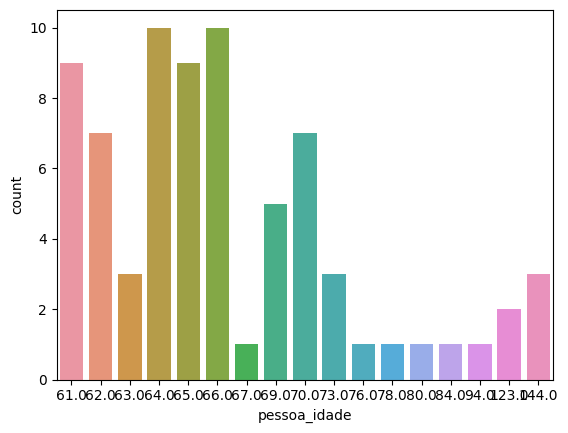

In [202]:
out = dados['pessoa_idade'].where(dados['pessoa_idade'] > 60)
sns.countplot(x=out)

In [203]:
#Apagar 2 pessoas acima de 100 anos
dados.drop(dados[dados["pessoa_idade"] > 86].index, inplace=True)

# Percebe-se que a idade se concentra entre 20 e 40 anos
# Teste sobre criar uma coluna de faixas etárias com intervalo de 5 anos.

faixa_etaria = [15, 20,25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
faixa_etaria_labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

dados['faixa_idade'] = pd.cut(
    x=dados['pessoa_idade'], bins=faixa_etaria, labels=faixa_etaria_labels)

predicao['faixa_idade'] = pd.cut(
    x=predicao['pessoa_idade'], bins=faixa_etaria, labels=faixa_etaria_labels)



# Salario Ano

In [190]:
dados['Faixa_Salarial'] = pd.qcut(dados['salario_ano'],  q=10, labels=False)

predicao['Faixa_Salarial'] = pd.qcut(predicao['salario_ano'],  q=10, labels=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   pessoa_id              307 non-null    object  
 1   pessoa_idade           307 non-null    float64 
 2   salario_ano            307 non-null    float64 
 3   propriedade_sit        307 non-null    int64   
 4   ano_trabalhado         307 non-null    float64 
 5   motivo_emprestimo      307 non-null    int64   
 6   pontuacao_emprestimos  307 non-null    int64   
 7   vl_total               307 non-null    float64 
 8   tx_juros               307 non-null    float64 
 9   inadimplencia          0 non-null      float64 
 10  tx_renda_divida        307 non-null    float64 
 11  hst_inadimplencia      307 non-null    float64 
 12  hst_primeiro_credito   307 non-null    int64   
 13  faixa_idade            307 non-null    category
 14  Faixa_Salarial         307 non-null    int

# Ano Trabalhado

<AxesSubplot:xlabel='ano_trabalhado', ylabel='count'>

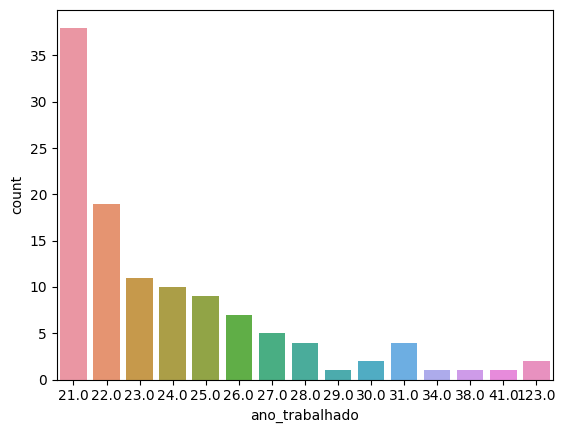

In [53]:
out = dados['ano_trabalhado'].where(dados['ano_trabalhado'] > 20)
sns.countplot(x=out)


In [54]:
dados.drop(
    dados[dados["ano_trabalhado"] > 50].index, inplace=True)


<AxesSubplot:xlabel='ano_trabalhado', ylabel='count'>

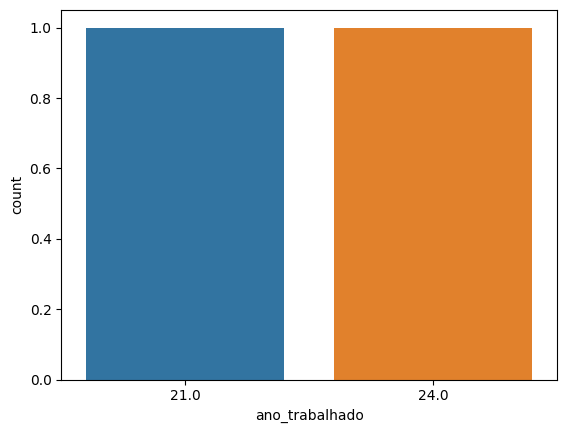

In [204]:
out = predicao['ano_trabalhado'].where(predicao['ano_trabalhado'] > 20)
sns.countplot(x=out)


# Valor Total

<AxesSubplot:xlabel='vl_total', ylabel='count'>

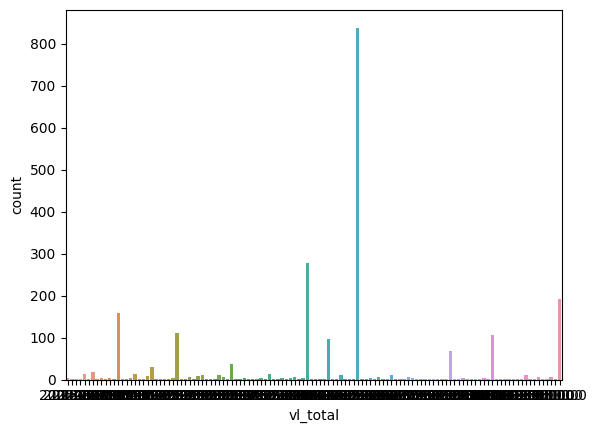

In [55]:
out = df_numericos['vl_total'].where(df_numericos['vl_total'] > 20000)
sns.countplot(x=out)


In [205]:
dados['Faixa_Emprestimo'] = pd.cut(x= dados['vl_total'], bins=35, labels=False)

predicao['Faixa_Emprestimo'] = pd.cut(x=predicao['vl_total'], bins=35, labels=False)


<AxesSubplot:xlabel='Faixa_Emprestimo', ylabel='count'>

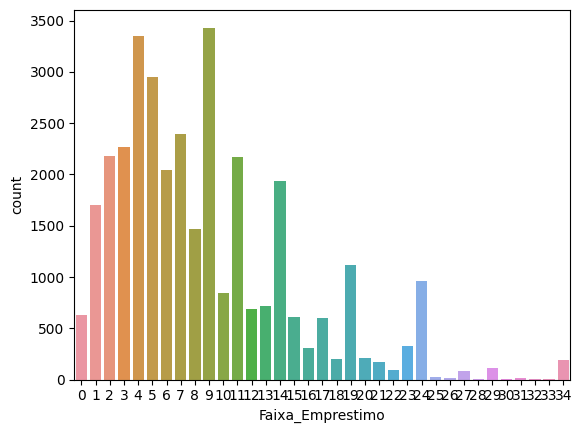

In [206]:
sns.countplot(x=dados['Faixa_Emprestimo'])

<AxesSubplot:xlabel='Faixa_Emprestimo', ylabel='count'>

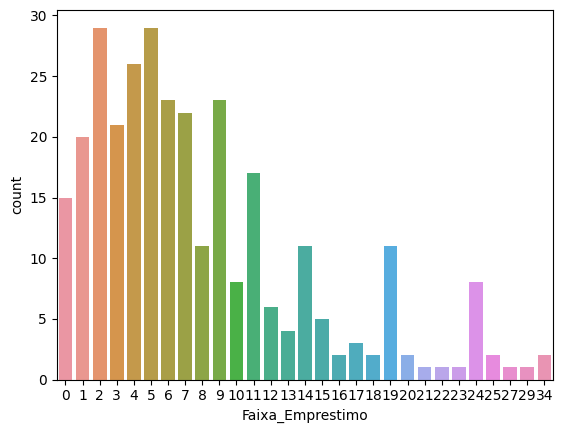

In [207]:
sns.countplot(x=predicao['Faixa_Emprestimo'])

# Primeiro Credito

<AxesSubplot:xlabel='faixa_idade', ylabel='hst_primeiro_credito'>

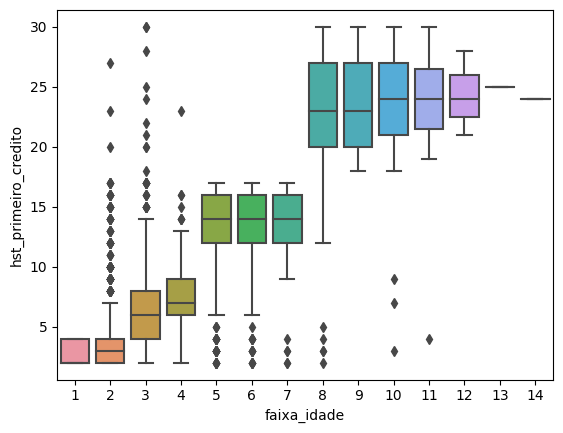

In [59]:

sns.boxplot(x=dados['faixa_idade'],
            y=dados['hst_primeiro_credito'])

# print(dados['pessoa_idade'].where(dados['faixa_idade'] == 2).unique())


In [60]:
dados.drop(dados[(dados["faixa_idade"] == 2) &(dados['hst_primeiro_credito'] > 20)].index, inplace=True)

In [61]:
dados.drop(dados[(dados["faixa_idade"] == 3) &(dados['hst_primeiro_credito'] > 25)].index, inplace=True)

<AxesSubplot:xlabel='faixa_idade', ylabel='hst_primeiro_credito'>

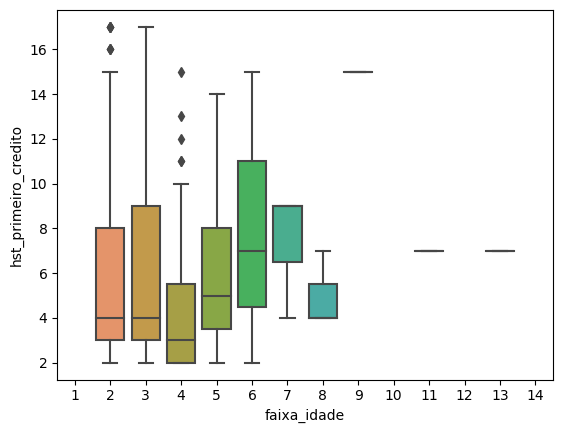

In [212]:
sns.boxplot(x=predicao['faixa_idade'],
            y=predicao['hst_primeiro_credito'])


In [209]:
predicao.drop(predicao[(predicao["faixa_idade"] == 2) &(predicao['hst_primeiro_credito'] > 20)].index, inplace=True)

In [211]:
predicao.drop(predicao[(predicao["faixa_idade"] == 3) &(predicao['hst_primeiro_credito'] > 25)].index, inplace=True)

# Finalizando
 - Exportando os datasets para a pasta Data, onde será lido pelo programa de treino e predição.
 

In [62]:
dados.describe()

dados.to_csv('Data/Dados.csv')

df_dados_semnulos.to_csv('Data/Dados_Sem_Nulos.csv')

# predicao necessita de tratamento das variaveis numericas.
predicao.to_csv('Data/Predicao.csv')